# Importing libraries and EDA

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Loading the dataset into pandas Dataframe
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

# Checking first 5 rows of the dataframe
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [3]:
# Checking statistics of the data
insurance_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration,48260.0,49.546602,104.828147,-2.0,9.0,22.0,53.00,4881.00
Net Sales,48260.0,40.747647,48.823217,-389.0,18.0,27.0,48.00,666.00
Commision (in value),48260.0,9.811735,19.695339,0.0,0.0,0.0,11.63,262.76
Age,48260.0,39.927269,14.027329,0.0,35.0,36.0,43.00,118.00
Claim,48260.0,0.014671,0.120231,0.0,0.0,0.0,0.00,1.00


In [4]:
#Gaining information on the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [5]:
#Checking all the unique values and their counts in these ordinal columns of the dataset 

display(insurance_data['Agency'].value_counts())
print('\n')
display(insurance_data['Agency Type'].value_counts())
print('\n')
display(insurance_data['Distribution Channel'].value_counts())
print('\n')
display(insurance_data['Product Name'].value_counts())
print('\n')
insurance_data['Destination'].value_counts()

EPX    26712
CWT     6572
C2B     6280
JZI     4851
SSI      807
JWT      580
RAB      577
LWC      532
TST      389
KML      293
ART      248
CCR      155
TTW       72
CBH       70
CSR       66
ADM       56
Name: Agency, dtype: int64

Travel Agency    34917
Airlines         13343
Name: Agency Type, dtype: int64

Online     47434
Offline      826
Name: Distribution Channel, dtype: int64

Cancellation Plan                       14202
2 way Comprehensive Plan                10000
Rental Vehicle Excess Insurance          6572
Basic Plan                               4209
Bronze Plan                              3057
1 way Comprehensive Plan                 2510
Value Plan                               2082
Silver Plan                              1705
Annual Silver Plan                       1088
Ticket Protector                          807
Travel Cruise Protect                     388
Comprehensive Plan                        279
Gold Plan                                 279
24 Protect                                183
Single Trip Travel Protect Gold           156
Annual Gold Plan                          151
Single Trip Travel Protect Silver         146
Premier Plan                              143
Annual Travel Protect Gold                 77
Annual Travel Protect Silver               64
Individual Comprehensive Plan              53
Single Trip Travel Protect Platinu

SINGAPORE        10068
THAILAND          4509
MALAYSIA          4479
CHINA             3642
AUSTRALIA         2807
                 ...  
SEYCHELLES           1
BENIN                1
ANGOLA               1
GUINEA-BISSAU        1
ALBANIA              1
Name: Destination, Length: 141, dtype: int64

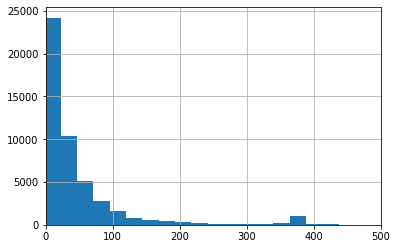

In [6]:
#Visualizing for the skewness in the Duration column

%matplotlib inline

insurance_data['Duration'].hist(bins=200)
plt.xlim(0,500)
plt.show()

In [7]:
#Finding out the gender of most insurance claimers
insurance_data.groupby('Claim')['Gender'].value_counts()

Claim  Gender
0      M         6909
       F         6507
1      F          255
       M          228
Name: Gender, dtype: int64

# Preprocessing the dataset

In [8]:
#Filling null values in Gender column with 'Not Specified'.
insurance_data['Gender']= insurance_data['Gender'].fillna('Not Specified')
test_data['Gender']= test_data['Gender'].fillna('Not Specified')

print(insurance_data['Gender'].isnull().sum())
test_data['Gender'].isnull().sum()

0


0

In [9]:
#Dropping irrelevant columns
X= insurance_data.drop(['Distribution Channel', 'Destination','Agency Type'], axis= 1)
test_data = test_data.drop(['Distribution Channel', 'Destination','Agency Type'], axis= 1)
X.head()

,Agency,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0
1,EPX,Cancellation Plan,93,63.0,0.00,Not Specified,36,0
2,EPX,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0
3,C2B,Silver Plan,14,54.5,13.63,M,24,0
4,EPX,Cancellation Plan,90,10.0,0.00,Not Specified,23,0


In [10]:
#One Hot Encoding the dataset to get only numeric values in dataset

X['Agency']= X['Agency'].astype('category')
X['Product Name']= X['Product Name'].astype('category')
X['Gender']= X['Gender'].astype('category')

test_data['Agency']= test_data['Agency'].astype('category')
test_data['Product Name']= test_data['Product Name'].astype('category')
test_data['Gender']= test_data['Gender'].astype('category')

X= pd.get_dummies(X)
test_data= pd.get_dummies(test_data)
X.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Gender_F,Gender_M,Gender_Not Specified
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
#Separating features and labels 
y= X['Claim']
X.drop(['Claim'],axis= 1, inplace= True)

display(X.head())
y.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan,Gender_F,Gender_M,Gender_Not Specified
0,61,19.8,11.88,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,93,63.0,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,22,22.0,0.00,25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14,54.5,13.63,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [12]:
#Spliting our dataset into training and validation set.
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state= 101)

In [13]:
#Checking the number of Insurance claimers and non-claimers.
y_train.value_counts()

0    33269
1      513
Name: Claim, dtype: int64

In [14]:
#OverSampling the claimers class.
from imblearn.over_sampling import SMOTE

sm=  SMOTE(random_state= 25, sampling_strategy= 1)
X_train, y_train= sm.fit_sample(X_train, y_train)

In [15]:
#Verifying the Oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

After OverSampling, counts of label '1': 33269
After OverSampling, counts of label '0': 33269


#Training and Validating Models

In [16]:
#Training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#Checking and Validating model's accuracy and F1 Score on Training and Validation set.
from sklearn.metrics import accuracy_score, f1_score
y_pred_train= LogReg.predict(X_train)
print("Accuracy of Log Reg model on training set is {:.2f}".format(accuracy_score(y_pred_train, y_train)))

y_pred_test= LogReg.predict(X_test)
print("Accuracy of Log Reg model on test set is {:.2f}".format(accuracy_score(y_pred_test, y_test)))

print("F1 Score of Log Reg model on training set is {:.2f}".format(f1_score(y_pred_train, y_train)))
print("F1 Score of Log Reg model on test set is {:.2f}".format(f1_score(y_pred_test, y_test)))

Accuracy of Log Reg model on training set is 0.77
Accuracy of Log Reg model on test set is 0.82
F1 Score of Log Reg model on training set is 0.75
F1 Score of Log Reg model on test set is 0.09


In [18]:
#Training a Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier

DecTr = DecisionTreeClassifier(random_state= 1)
DecTr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [19]:
#Checking and Validating model's accuracy and F1 Score on Training and Validation set.
y_pred_train_DT= DecTr.predict(X_train)
print("Accuracy of Decision Tree model on training set is {:.2f}".format(accuracy_score(y_pred_train_DT, y_train)))

y_pred_test_DT= DecTr.predict(X_test)
print("Accuracy of Decision Tree model on test set is {:.2f}".format(accuracy_score(y_pred_test_DT, y_test)))

print("F1 Score of Decision Tree model on training set is {:.2f}".format(f1_score(y_pred_train_DT, y_train)))
print("F1 Score of Decision Tree model on test set is {:.2f}".format(f1_score(y_pred_test_DT, y_test)))

Accuracy of Decision Tree model on training set is 1.00
Accuracy of Decision Tree model on test set is 0.96
F1 Score of Decision Tree model on training set is 1.00
F1 Score of Decision Tree model on test set is 0.08


In [20]:
#Training a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RndFrstClf= RandomForestClassifier(random_state= 1)
RndFrstClf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [21]:
#Checking and Validating model's accuracy and F1 Score on Training and Validation set.
y_pred_train_RF= RndFrstClf.predict(X_train)
print("Accuracy of Random Forest model on training set is {:.2f}".format(accuracy_score(y_pred_train_RF, y_train)))

y_pred_test_RF= RndFrstClf.predict(X_test)
print("Accuracy of Random Forest model on test set is {:.2f}".format(accuracy_score(y_pred_test_RF, y_test)))

print("F1 Score of Random Forest model on training set is {:.2f}".format(f1_score(y_pred_train_RF, y_train)))
print("F1 Score of Random Forest model on test set is {:.2f}".format(f1_score(y_pred_test_RF, y_test)))

Accuracy of Random Forest model on training set is 1.00
Accuracy of Random Forest model on test set is 0.97
F1 Score of Random Forest model on training set is 1.00
F1 Score of Random Forest model on test set is 0.06


#Finding best parameter and Best Model

In [22]:
#Implementing GridSearchCV to search for best parameters of Random Forest Classifier
from sklearn.model_selection import GridSearchCV

params= {
    'bootstrap': [True],
    'max_depth': [10, 20],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [4, 6],
    'n_estimators': [100, 200],
}
RndFrst= RandomForestClassifier(random_state= 1)
grid_search_1= GridSearchCV(RndFrst, params, cv= 3, n_jobs= -1, verbose= 2 )

#Training on the training data
grid_res= grid_search_1.fit(X_train, y_train)
grid_res.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.1min finished


{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [23]:
#Implementing GridSearchCV to search for best parameters of Decision Tree Classifier
DTC= DecisionTreeClassifier(random_state= 1)
params2= {
    'max_leaf_nodes': [5, 10, 15, 20],
    'min_samples_split': [4, 6, 8, 10]
}
grid_search_2= GridSearchCV(DTC, params2, cv= 3, n_jobs= -1, verbose= 2)

grid_res_DTC= grid_search_2.fit(X_train, y_train)
grid_res_DTC.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.6s finished


{'max_leaf_nodes': 20, 'min_samples_split': 4}

In [24]:
#Checking and Validating the model on training and validation data
y_pred_train_GS1= grid_search_1.predict(X_train)
print("Accuracy of 2nd Random Forest model on training set is {:.2f}".format(accuracy_score(y_pred_train_GS1, y_train)))

y_pred_test_GS1= grid_search_1.predict(X_test)
print("Accuracy of 2nd Random Forest model on test set is {:.2f}".format(accuracy_score(y_pred_test_GS1, y_test)))

print("F1 Score of 2nd Random Forest model on training set is {:.2f}".format(f1_score(y_pred_train_GS1, y_train)))
print("F1 Score of 2nd Random Forest model on test set is {:.2f}".format(f1_score(y_pred_test_GS1, y_test))) 

Accuracy of 2nd Random Forest model on training set is 0.98
Accuracy of 2nd Random Forest model on test set is 0.96
F1 Score of 2nd Random Forest model on training set is 0.98
F1 Score of 2nd Random Forest model on test set is 0.09


In [25]:
#Checking and Validating the model on training and validation data
y_pred_train_DT2= grid_search_2.predict(X_train)
print("Accuracy of 2nd Decision Tree model on training set is {:.2f}".format(accuracy_score(y_pred_train_DT2, y_train)))

y_pred_test_DT2= grid_search_2.predict(X_test)
print("Accuracy of 2nd Decision Tree model on test set is {:.2f}".format(accuracy_score(y_pred_test_DT2, y_test)))

print("F1 Score of 2nd Decision Tree model on training set is {:.2f}".format(f1_score(y_pred_train_DT2, y_train)))
print("F1 Score of 2nd Decision Tree model on test set is {:.2f}".format(f1_score(y_pred_test_DT2, y_test)))

Accuracy of 2nd Decision Tree model on training set is 0.83
Accuracy of 2nd Decision Tree model on test set is 0.94
F1 Score of 2nd Decision Tree model on training set is 0.81
F1 Score of 2nd Decision Tree model on test set is 0.12


#Selection of Best Features

In [26]:
 #Selecting best features to train the model on
from sklearn.feature_selection import RFE

RFC= RandomForestClassifier(random_state= 1, bootstrap= True, max_depth= 20,
                            min_samples_leaf= 3, min_samples_split= 4, n_estimators= 200)
selector= RFE(RFC, step= 1)
selector.fit(X_train, y_train)


print("Number of features selected for the model to train on: {}".format(selector.support_.sum()))
print("\n")
print("The ranking of all the features are as follows: ")
selector.ranking_

Number of features selected for the model to train on: 24


The ranking of all the features are as follows: 


array([ 1,  1,  1,  1, 22, 12,  1, 24, 17, 23,  1,  1,  4,  1, 10,  1, 14,
        3,  5, 18,  1,  1, 21, 11,  1,  2, 19, 13,  1,  1,  1, 25,  7,  1,
       15, 16,  1,  1,  1,  1,  8, 20,  6,  9, 26,  1,  1,  1,  1])

In [27]:
#Making prediction on validation set 
y_pred_test_RFE= selector.predict(X_test)
#Checking the accuracy and F1 score on validatin set
print("Accuracy of Random Forest model on test set is {:.2f}".format(accuracy_score(y_pred_test_RFE, y_test)))
print("F1 Score of Random Forest model on test set is {:.2f}".format(f1_score(y_pred_test_RFE, y_test))) 
      

Accuracy of Random Forest model on test set is 0.96
F1 Score of Random Forest model on test set is 0.08


In [28]:
DTC2= DecisionTreeClassifier(random_state= 1, max_leaf_nodes= 20, min_samples_split= 4)
selector2= RFE(DTC2,step=1)
selector2.fit(X_train, y_train)

print("Number of features selected for the model to train on: {}".format(selector2.support_.sum()))
print("\n")
print("The ranking of all the features are as follows: ")
selector2.ranking_ 

Number of features selected for the model to train on: 24


The ranking of all the features are as follows: 


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  4, 10,  9,  1, 15,  1, 19,
       20, 17,  5, 11,  1, 23, 25, 26, 24, 22, 18, 16,  1,  1,  1,  1,  1,
        1,  2,  6,  1,  1,  1,  8, 12, 13, 14,  1,  1,  1,  7, 21])

In [29]:
#Making prediction on validation set 
y_pred_test_RFE2= selector2.predict(X_test)
#Checking the accuracy and F1 score on validatin set
print("Accuracy of Decision Tree model on test set is {:.2f}".format(accuracy_score(y_pred_test_RFE2, y_test)))
print("F1 Score of Decision Tree model on test set is {:.2f}".format(f1_score(y_pred_test_RFE2, y_test))) 

Accuracy of Decision Tree model on test set is 0.94
F1 Score of Decision Tree model on test set is 0.12


#Predicting on test_data

**Predicting on test data using Random Forest model i.e. selector**

In [30]:
#inserting a column which is not present in test_data to maintain the shape of the dataframe
test_data.insert(44, 'Product Name_Travel Cruise Protect Family', 0)

In [31]:

prediction= selector.predict(test_data)
predicted_data= pd.DataFrame(prediction, columns=['prediction'])
predicted_data.to_csv('predictions.csv', index=False)

**Predicting on test data using Decision Tree model i.e. selector2**

In [32]:
prediction2= selector2.predict(test_data)
predicted_data2= pd.DataFrame(prediction2, columns=['prediction'])
predicted_data2.to_csv('predictions2.csv', index=False)